In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Checking table columns sample.
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd0d9abb880>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [10]:
# Find the most recent date in the data set.
last_measure_date = session.query(func.max(Measurement.date)).scalar()
last_measure_date

'2017-08-23'

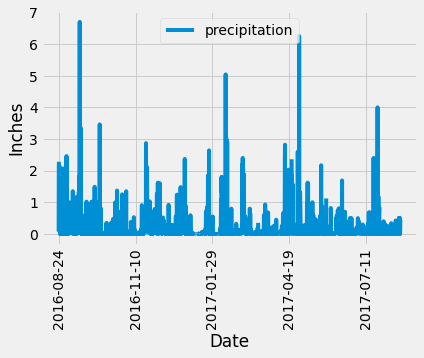

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_measure_date

# Calculate the date one year from the last date in data set.
# Convert the string to date first then calculate one year ago
# See https://jingwen-z.github.io/converting-between-datetime-and-string/
one_year_ago = dt.datetime.strptime(last_measure_date,'%Y-%m-%d') - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= one_year_ago).\
        order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_df = pd.DataFrame(results)

# Sort the dataframe by date
one_year_df = one_year_df.set_index('date')
one_year_df

# Use Pandas Plotting with Matplotlib to plot the data
one_year_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'])
plt.xticks(rotation=90)
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [17]:
# Close Session
session.close()